In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

In [2]:
import numpy as np
import warnings
from scipy.optimize import minimize
from scipy import stats
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from branching_process.util import plots

In [3]:
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model
sim = reload(sim)
influence = reload(influence)
model = reload(model)


Automatic pdb calling has been turned OFF


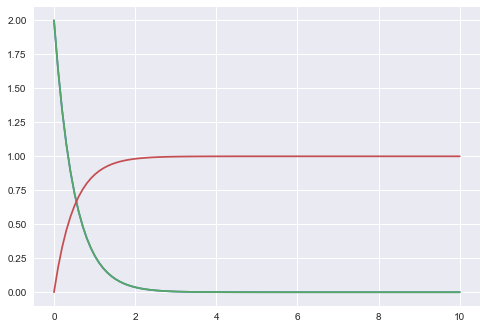

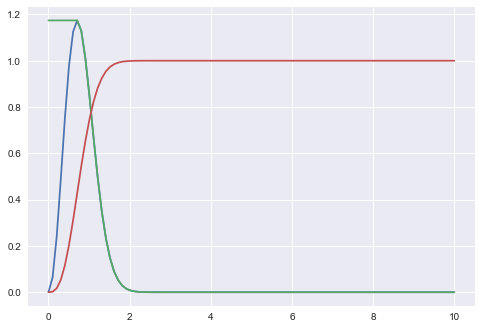

In [4]:
%pdb off
influence = reload(influence)
exp_phi = influence.ExpKernel()
causal_phi = influence.MaxwellKernel()
eval_ts = np.linspace(0, 10, 100)
tau=0.5

plt.figure();
plt.plot(eval_ts, exp_phi(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, exp_phi.majorant(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, exp_phi.integrate(eval_ts, tau=tau).ravel());

plt.figure();
plt.plot(eval_ts, causal_phi(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, causal_phi.majorant(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, causal_phi.integrate(eval_ts, tau=tau).ravel());


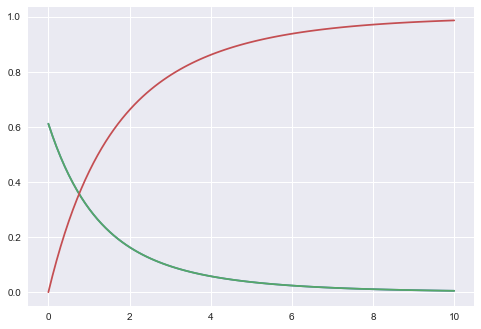

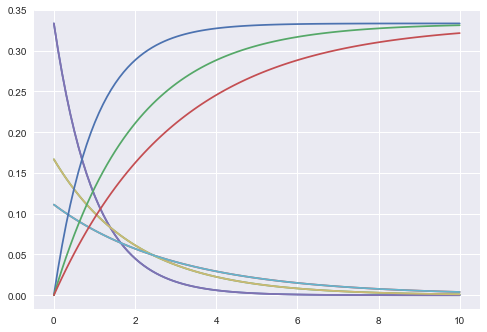

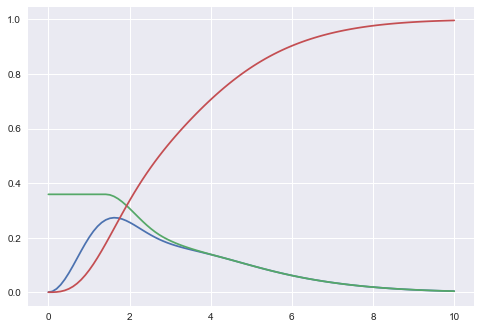

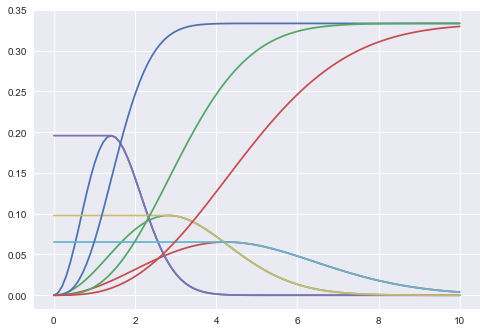

In [5]:
influence = reload(influence)
exp_phi = influence.ExpKernel(n_bases=3)
causal_phi = influence.MaxwellKernel(n_bases=3)
eval_ts = np.linspace(0, 10, 100)
tau=np.array([1,2,3])

plt.figure();
plt.plot(eval_ts, exp_phi(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.majorant(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.integrate(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, exp_phi.call_each(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.majorant_each(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.integrate_each(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, causal_phi(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.majorant(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.integrate(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, causal_phi.call_each(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.majorant_each(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.integrate_each(eval_ts, tau=tau));


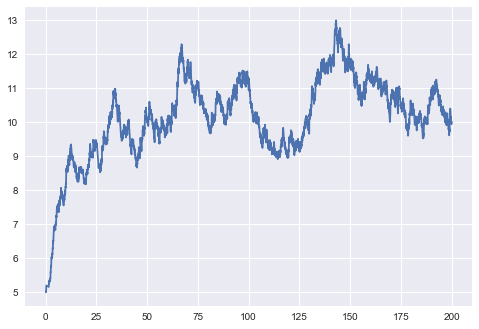

In [6]:
import numpy.random


sim = reload(sim)
influence = reload(influence)
model = reload(model)

numpy.random.seed(1237)

fixed_exp_phi = influence.ExpKernel(tau=5)

param_exp = dict(
    phi_kernel=fixed_exp_phi,
    mu=5.0,
    eta=0.5,
    t_start=0.0,
    t_end=200)

ts = sim.sim_hawkes(sort=True, **param_exp)
eval_ts = np.linspace(param_exp['t_start'], param_exp['t_end'], 5000)

true_intensity = model.lam_hawkes(ts, eval_ts=eval_ts, **param_exp)
plt.plot(eval_ts, true_intensity);

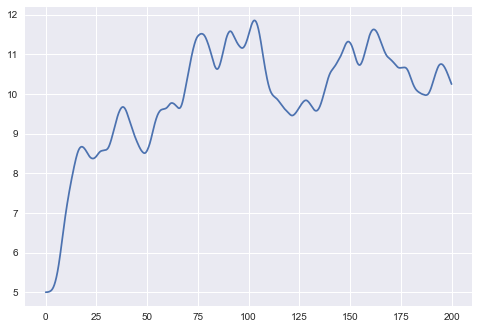

In [7]:
import numpy.random
numpy.random.seed(1237)
causal_phi = influence.MaxwellKernel(tau=5)

param_causal = dict(
    phi_kernel=causal_phi,
    mu=5.0,
    eta=0.5,
    t_start=0.0,
    t_end=200)

sim = reload(sim)
ts = np.sort(sim.sim_hawkes(**param_causal));
eval_ts = np.linspace(param_causal['t_start'], param_causal['t_end'], 5000)

true_intensity = model.lam_hawkes(ts, eval_ts=eval_ts, **param_causal)
plt.plot(eval_ts, true_intensity);

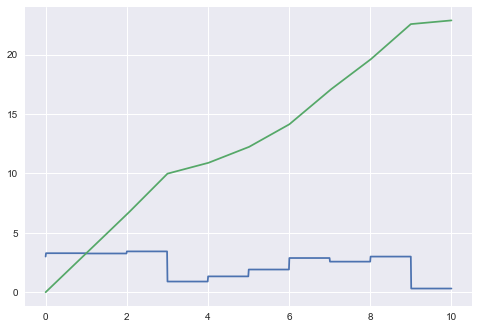

In [8]:
influence = reload(influence)
eval_ts = np.linspace(0, 10, 1000)
numpy.random.seed(1237)
mu = 3
n_bases = 10
kappa = np.random.uniform(-1,1, size=n_bases)**3*3

step_phi = influence.LinearStepKernel(n_bases=n_bases, t_end=10, mu=mu)

plt.figure();
plt.plot(eval_ts, step_phi(eval_ts, kappa=kappa));
plt.plot(eval_ts, step_phi.integrate(eval_ts, kappa=kappa));



In [12]:
%pdb on
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model
sim = reload(sim)
influence = reload(influence)
model = reload(model)

fixed_exp_phi = influence.ExpKernel(tau=5, kappa=0.5)
approx_kernel = influence.MaxwellKernel(n_bases=5, tau=np.array([1,2,3,4,5]))

param_exp = dict(
    phi_kernel=fixed_exp_phi,
    mu=5.0,
    eta=1.0,
    t_start=0.0,
    t_end=200)

ts = sim.sim_hawkes(**param_exp);

print(
    model.loglik(ts=ts, mu=0.5, phi_kernel=approx_kernel, phi_kwargs=dict(kappa=np.array([0.5, 0.3, 0, 0, 0,]))),
    model.loglik(ts=ts, mu=5, phi_kernel=approx_kernel, phi_kwargs=dict(kappa=np.array([0.5, 0.3, 0, 0, 0,]))),
    model.loglik(ts=ts, mu=50, phi_kernel=approx_kernel, phi_kwargs=dict(kappa=np.array([0.5, 0.3, 0, 0, 0,]))),
)


Automatic pdb calling has been turned ON
[ 2493.15425766] [ 2470.60613074] [-3547.9394203]


In [ ]:
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, fit
sim = reload(sim)
influence = reload(influence)
model = reload(model)
fit = reload(fit)

hawkes = fit.ContinuousExact(
    debug=True
)
fit = hawkes.fit(
    ts,
    phi_kernel=influence.MaxwellKernel(n_bases=5, tau=np.array([1,2,3,4,5])),
    fit_omega=False,
    fit_tau=False,
)
print(fit.param)

[ 1.  0.  0.  0.  0.  0.] [ -1774.0956099  -17662.82011683 -17554.16766353 -17465.61564119
 -17346.74207775 -17228.6935862 ]
[ 1.31622731  0.31622776  0.31622776  0.31622776  0.31622776  0.31622776] [  72.34785353  789.62029126  795.89309555  792.37060187  786.98552648
  780.24352432]
[ 1.30662423  0.30570232  0.30555338  0.30554676  0.30554665  0.30556555] [  68.36517432  751.63561693  758.40733097  755.22592634  750.1795593
  743.74524303]
[ 1.29882132  0.29708884  0.29680908  0.29679502  0.29679382  0.29682826] [  64.90831298  718.63715336  725.83692186  722.9494969   718.19631563
  712.02875693]
[ 1.29206463  0.28957953  0.28917837  0.28915618  0.28915321  0.28920127] [  61.73651541  688.33715254  695.92561954  693.30622736  688.82138863
  682.89833233]
[ 1.2860112   0.28280598  0.28228874  0.28225774  0.28225243  0.28231285] [  58.73922744  659.68484919  667.63706807  665.2694547   661.03760095
  655.34536238]
[ 1.28047418  0.27656673  0.27593637  0.27589589  0.27588775  0.2759596